In [2]:
#importing libraries visualization and data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Libraries for building random forest classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
#Reading our data using pandas
data=pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#checking for null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#Looking at all the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Summarizing the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Looking at the number of rows and columns in the dataset
data.shape

(150, 6)

In [59]:
#dropping column
data.drop(columns = 'Id',axis=1,inplace=True)

In [60]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
#unique values in each column
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

# EDA and DATA VISUALIZATIONS

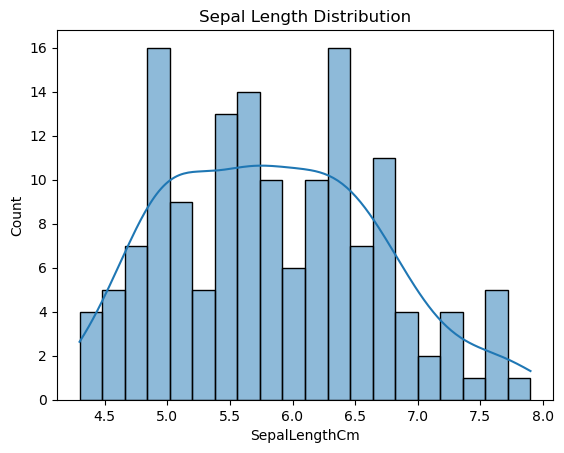

In [62]:
# Looking at the distribution of the various columns
sns.histplot(data=data, x='SepalLengthCm', bins=20, kde=True)
plt.title('Sepal Length Distribution')
plt.show()

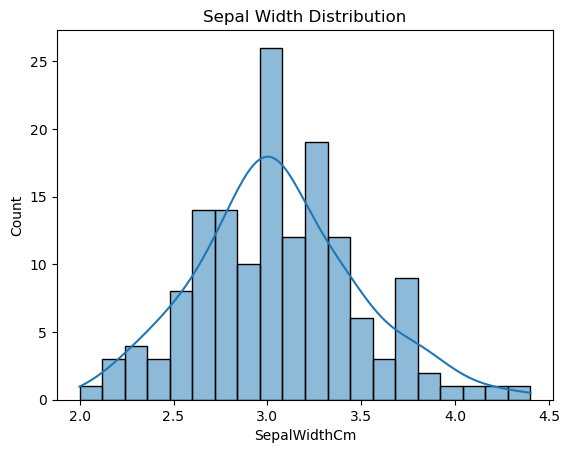

In [64]:
sns.histplot(data=data, x='SepalWidthCm', bins=20, kde=True)
plt.title('Sepal Width Distribution')
plt.show()

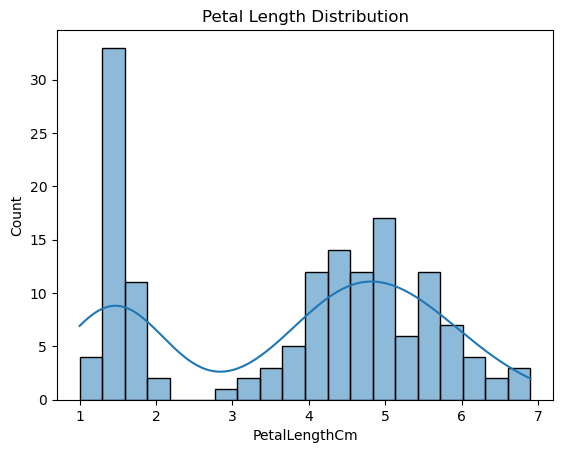

In [65]:
sns.histplot(data=data, x='PetalLengthCm', bins=20, kde=True)
plt.title('Petal Length Distribution')
plt.show()

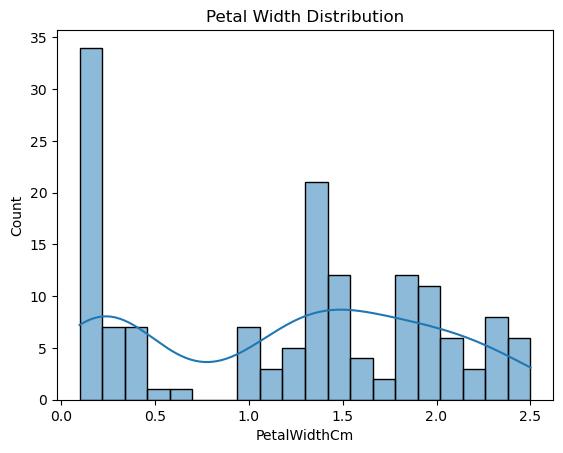

In [66]:
sns.histplot(data=data, x='PetalWidthCm', bins=20, kde=True)
plt.title('Petal Width Distribution')
plt.show()

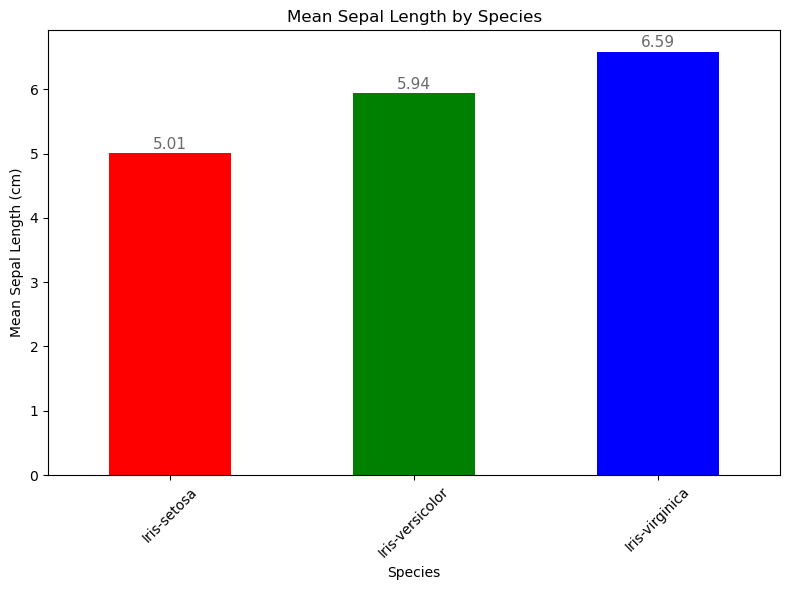

In [69]:
#calculate the mean
c=data.groupby('Species')['SepalLengthCm'].mean()

#define colores for the bars
color=['red','green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Sepal Length by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Sepal Length (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.02, 
            str(round((i.get_height()), 2)), 
            fontsize=11, color='dimgrey', ha='center', va='bottom')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

 Iris-Virginica has the highest Sepal length on average followed by Iris-versicolor and lastly Iris-Setosa has the least Sepal length

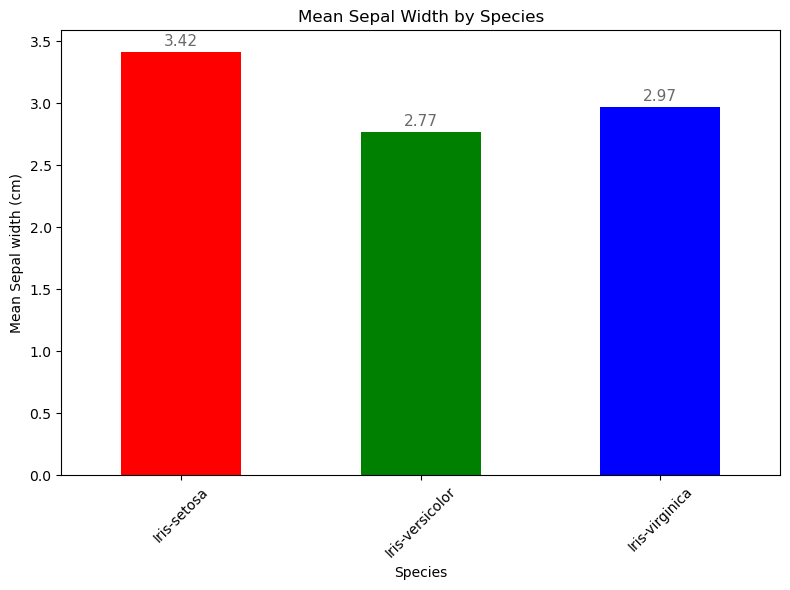

In [14]:
#calculate the mean
c=data.groupby('Species')['SepalWidthCm'].mean()

#define colores for the bars
color=['red','green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Sepal Width by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Sepal width (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.02, 
            str(round((i.get_height()), 2)), 
            fontsize=11, color='dimgrey', ha='center', va='bottom')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

 Iris-Setosa has the highest Sepal width on average followed by Iris-Virginica and lastly the Iris-Versicolor has the least Sepal Width

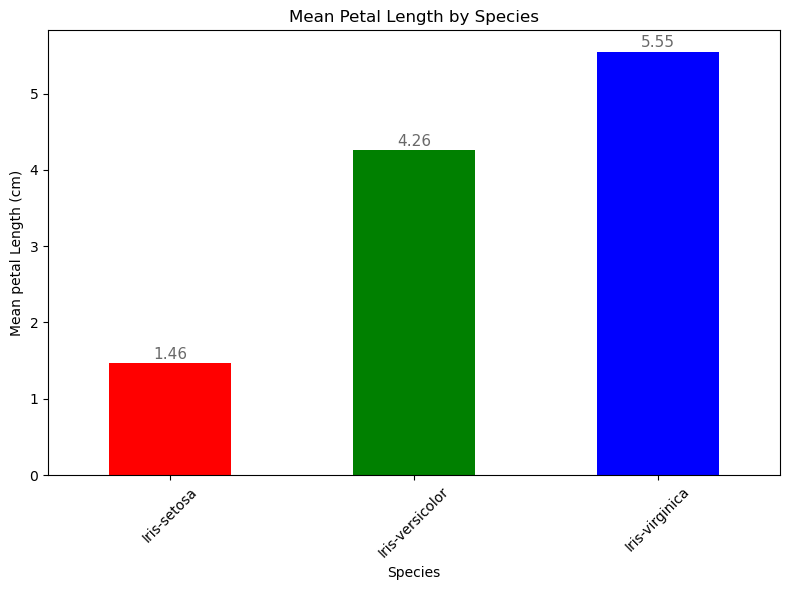

In [12]:
#calculate the mean
c=data.groupby('Species')['PetalLengthCm'].mean()

#define colores for the bars
color=['red','green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Petal Length by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean petal Length (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.02, 
            str(round((i.get_height()), 2)), 
            fontsize=11, color='dimgrey', ha='center', va='bottom')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

 Iris-Virginica has the highest Petal length on average followed by Iris-versicolor and lastly Iris-Setosa has the least Petal length

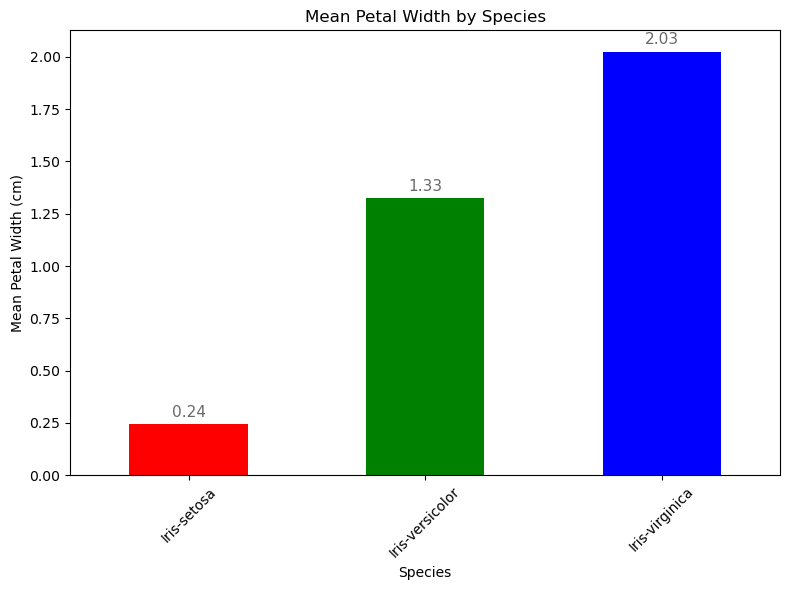

In [11]:
#calculate the mean
c=data.groupby('Species')['PetalWidthCm'].mean()

#define colores for the bars
color=['red','green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Petal Width by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Petal Width (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.02, 
            str(round((i.get_height()), 2)), 
            fontsize=11, color='dimgrey', ha='center', va='bottom')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

 Iris-Virginica has the highest Petal Width on average followed by Iris-versicolor and lastly Iris-Setosa has the least Petal Width

C:\Users\User\AppData\Local\Temp\ipykernel_8376\286700782.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c=data.groupby('Species')['SepalLengthCm','PetalLengthCm'].mean()


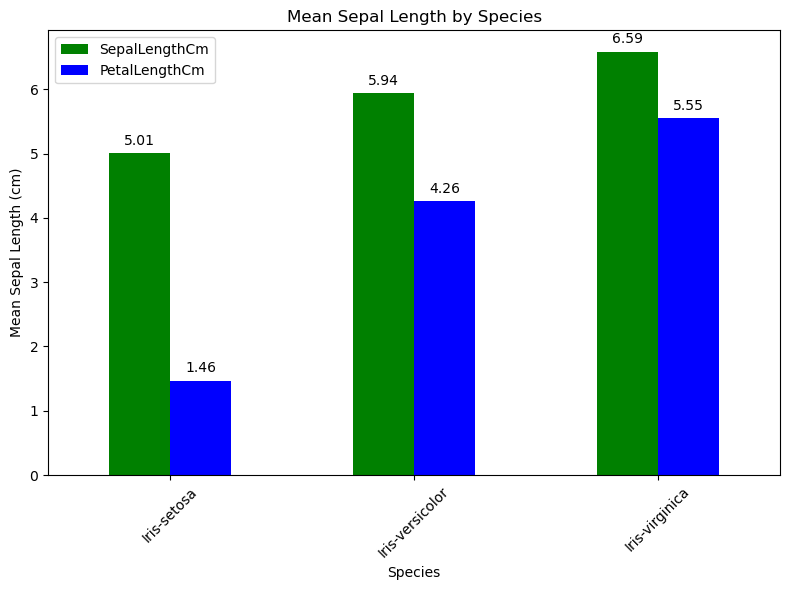

In [74]:
#calculate the mean
c=data.groupby('Species')['SepalLengthCm','PetalLengthCm'].mean()

#define colores for the bars
color=['green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Sepal Length by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Sepal Length (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),
                    (p.get_x()+ p.get_width() / 2.,p.get_height()),
                    ha='center',va='center',
                    xytext=(0,9),
                    textcoords='offset points')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8376\2985264523.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c=data.groupby('Species')['SepalWidthCm','PetalWidthCm'].mean()


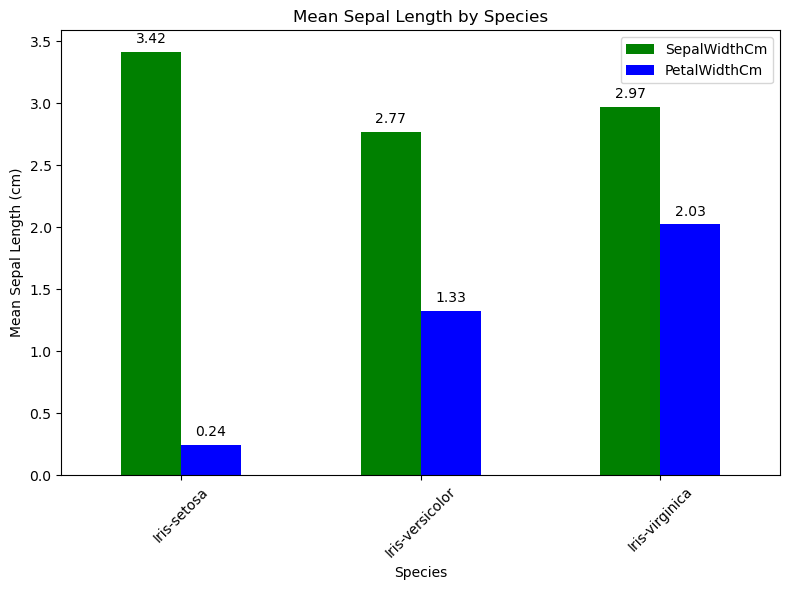

In [75]:
#calculate the mean
c=data.groupby('Species')['SepalWidthCm','PetalWidthCm'].mean()

#define colores for the bars
color=['green','blue']

# Create a bar plot with custom colors
ax = c.plot(kind='bar', figsize=(8, 6), color=color)

# Set the title and labels
ax.set_title('Mean Sepal Length by Species')
ax.set_xlabel('Species')
ax.set_ylabel('Mean Sepal Length (cm)')
ax.set_xticklabels(c.index, rotation=45)  # Rotate the species names for better readability

# Add the text labels on the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),
                    (p.get_x()+ p.get_width() / 2.,p.get_height()),
                    ha='center',va='center',
                    xytext=(0,9),
                    textcoords='offset points')

# Adjust the layout

plt.tight_layout()

# Show the plot
plt.show()

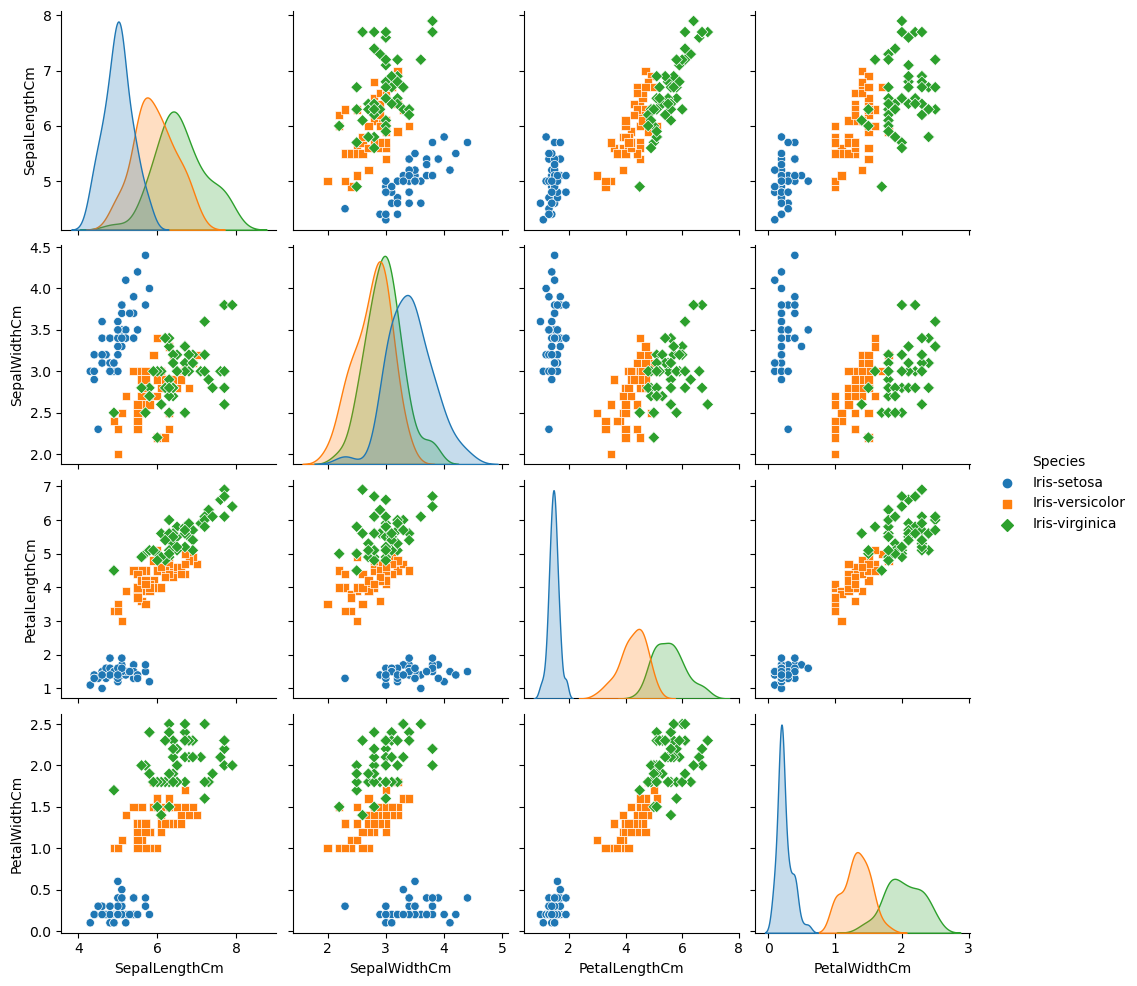

In [76]:
# Pairplot to visualize the distribution of features and relationships between them
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.show()

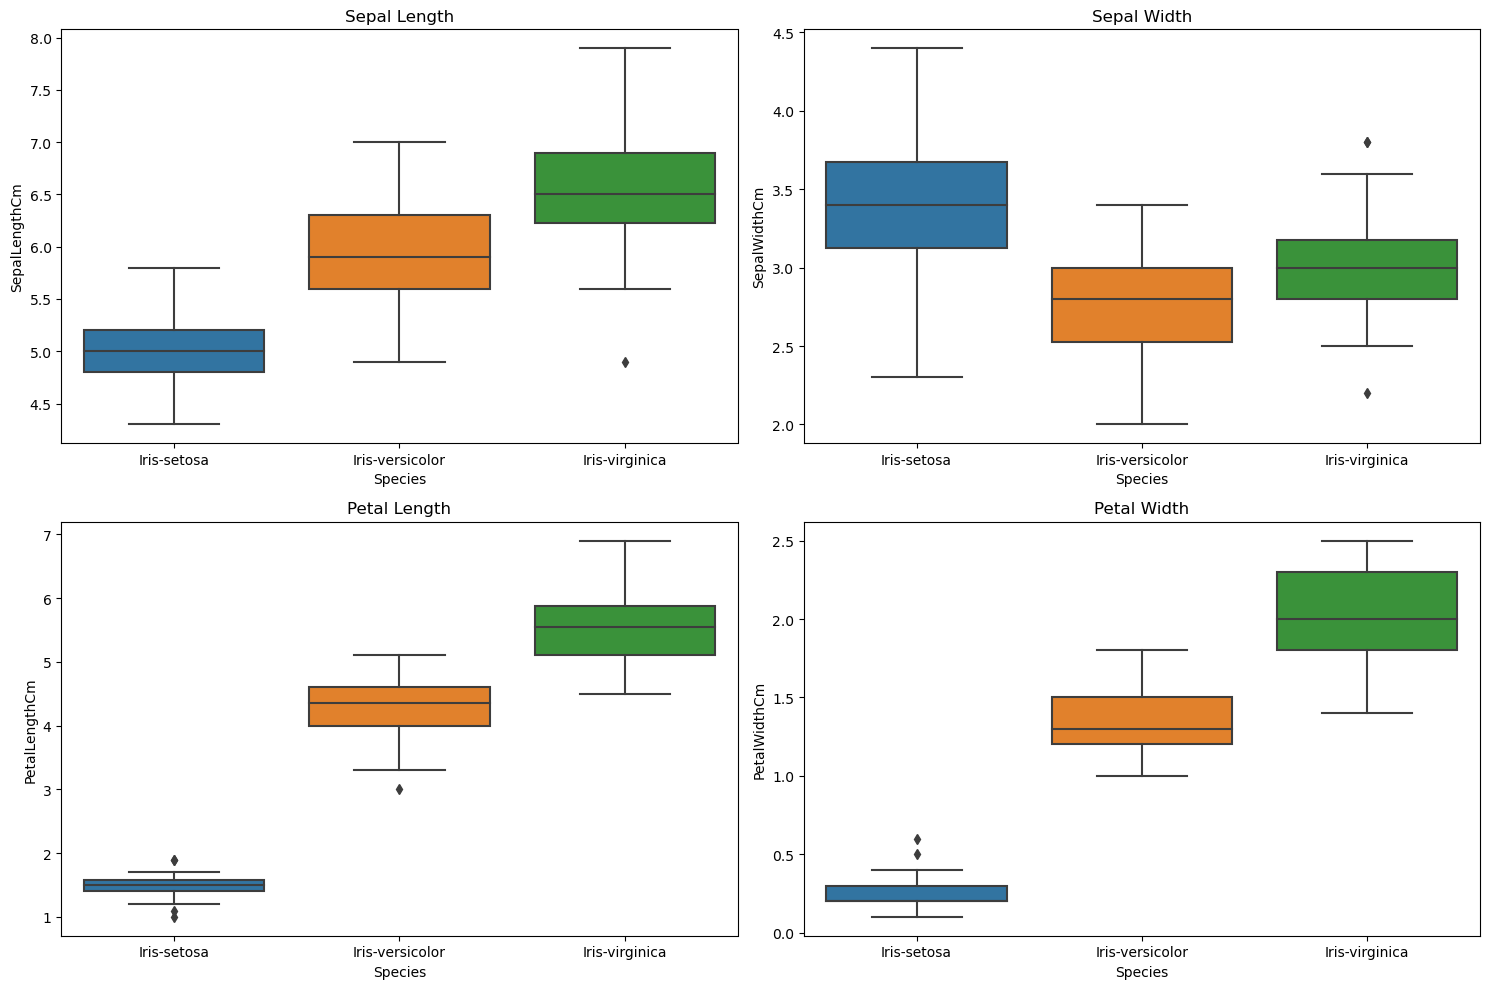

In [15]:
# Set up a matplotlib figure with multiple subplots
plt.figure(figsize=(15, 10))

# List of features and their titles for plotting
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
titles = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create a boxplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=data)
    plt.title(titles[i-1])

# Adjust the layout
plt.tight_layout()
plt.show()

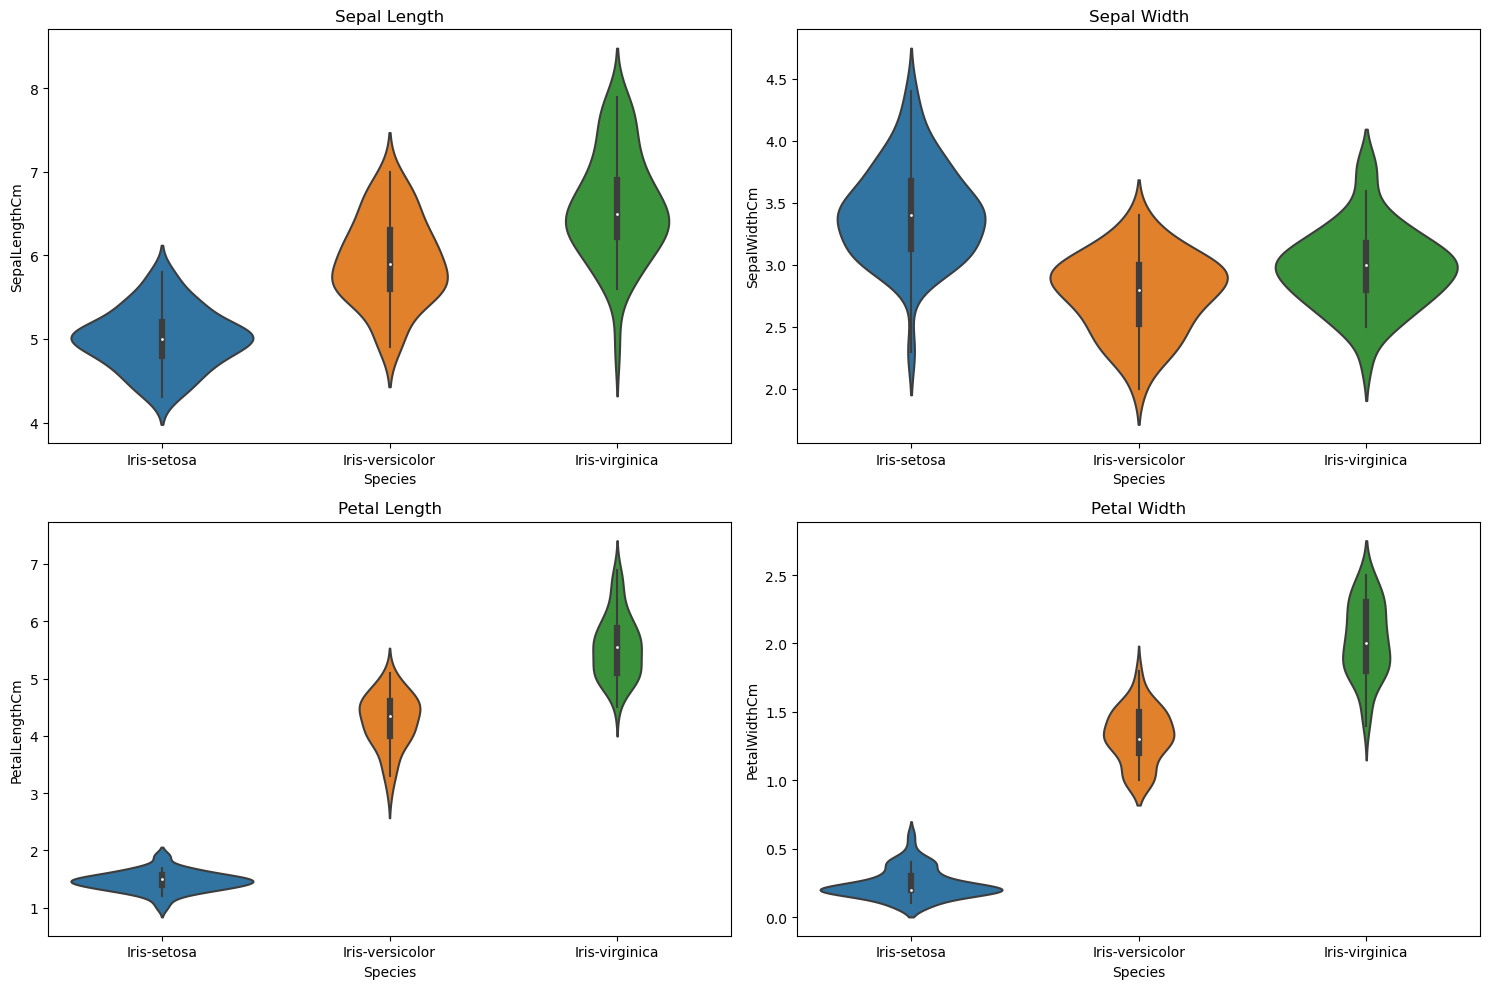

In [16]:

# Set up a matplotlib figure with multiple subplots
plt.figure(figsize=(15, 10))

# Create a violin plot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Species', y=feature, data=data)
    plt.title(titles[i-1])

# Adjust the layout
plt.tight_layout()
plt.show()

# TRAINING OF THE MODEL

In [17]:
# Encode the 'Species' variable
le = LabelEncoder()
data['Species_encoded'] = le.fit_transform(data['Species'])

# Define features and labels
X = data.drop(['Species', 'Species_encoded'], axis=1)

y = data['Species_encoded']

# Split the data into a training set (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# TEST MODEL

In [23]:
# Predict on the 10% test set using the Random Forest model trained earlier
y_pred_rf_10 = rf_classifier.predict(X_test)

# Create a DataFrame to display actual vs predicted values for the Random Forest predictions
predictions_rf_10 = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    'Predicted': le.inverse_transform(y_pred_rf_10)
})

predictions_rf_10

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


### The model demonstrated exceptional performance, achieving 100% accuracy during training. Furthermore, it maintained this perfect accuracy rate when tested on the remaining 10% of the data, accurately predicting all the actual values